# Problem Statement: Airbnb Hotel Booking Analysis.

The hospitality industry has undergone a significant transformation with the rise of online platforms facilitating short-term lodging and tourism. Leading this revolution is Airbnb, Inc., a pioneering American company that has reshaped travel accommodation through its innovative online marketplace. Established in 2008 in San Francisco, California, Airbnb provides a diverse range of lodging options, offering guests a unique and personalized experience. Unlike traditional hospitality providers, Airbnb operates on a commission-based model, facilitating transactions between hosts and guests without owning the properties listed on its platform.

This project delves into Airbnb’s impact on New York City’s Airbnb dataset to understand its operational insights. Through rigorous data cleaning, exploratory analysis, and visualization techniques, the study aims to illuminate the dynamics of the city’s lodging market. By discerning factors influencing pricing, neighborhood popularity, and customer satisfaction, the research offers stakeholders actionable insights to foster a deeper understanding of Airbnb’s role in urban tourism and accommodation trends. These insights hold significance for stakeholders and enthusiasts seeking to navigate the evolving landscape of short-term accommodation.


---

QUESTIONS

This project is aimed to uncover some insights from the Airbnb Open Data. The following questions would be answered from the data:

1. What are the different property types in the Dataset?


2. Which neighborhoods group has the highest number of listings?


3. Which neighborhood has the highest number of entire home/apartment type listings?


4. Is there a relationship between availability and price of property and price?


5. Which is the busiest host with the highest number of listings?


6. Which neighborhood has the highest number of private room type listings?


7. Which are the top 10 most reviewed listings?


8. Is there a correlation between host service and listings reviews?


9. Is there a correlation between the location of a listing and its service fee?

# DATA WRANGLING
 Data wrangling , a crucial phase in the data analysis process,involves preparing and cleaning raw data to make it suitable for analysis.This involves tasks such as handling missing values,removing duplicates and transfforming data into a consistent format.Effective data wrangling ensures that the data is reliable and ready for exploration,enabling meaningful insights to be derived from it.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/1730285881-Airbnb_Open_Data(in) (3) (1).csv')

/tmp/ipython-input-4215896643.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/1730285881-Airbnb_Open_Data(in) (3) (1).csv')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


ACCESS THE DATA

In [ ]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [ ]:
df.duplicated().value_counts()

,count
False,102058
True,541


In [ ]:
df[df['neighbourhood group']=='brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,$116,4.0,167.0,6/24/2019,1.34,4.0,3.0,47.0,NaN,NaN


Problems identified within the Data
   

*   541 duplicate records were found in the data
*   Insufficient information were recorded for the house_rulers and Licence columns.


*  Missing values in some records
* Columns like the price,service fee,id,host id,Construction year are assigned wrong datatypes

* Dollar signs and commas recorded along with values for price and service fee.  
* Some outliers were identified in the availability 365 column.

* In the neighbourhood group column the spelling of 'Brooklyn' was misspelt in some records.

* The currency for price and service fee were not added to the column's title


CLEAN THE DATA

Steps to clean the data

1.Drop the duplicate records

2.Drop house_rules and license columns with insufficient data.

3.Remove dollar signs

4.Remove all commas from price and fee columns
5.Drop all records with missing values

6.Change mismatched data types with appropriate ones.
7.Correct spellings of 'brooklin' to 'brooklyn'
8.Get rid of outliers in the 'avalibility 365' column data

In [ ]:
#Drop duplicate records
df.drop_duplicates(inplace=True)

#Drop house_rules and license columns with insufficient data
df.drop(['house_rules','license'],axis=1,inplace=True)

#Remove all dollar signs in price and service fee columns
df['price']=df['price'].str.replace('$','',regex=False)
df['service fee']=df['service fee'].str.replace('$','',regex=False)

#Remove all commas in price and service fee columns
df['price']=df['price'].str.replace(',','',regex=False)
df['service fee']=df['service fee'].str.replace(',','',regex=False)

#Rename the price and service fee columns to include a dollar sign
df.rename(columns={'price':'$price','service fee':'$service fee'},inplace=True)
#Drop all records with missing values
df.dropna(inplace=True)
#Change the mismatched data types to the appropriate ones
df['$price']=df['$price'].astype(float)
df['$service fee']=df['$service fee'].astype(float)
df['id']=df['id'].astype(int)
df['host id']=df['host id'].astype(int)
df['Construction year']=df['Construction year'].astype(int)

#Correct the spelling brooklyn
df.loc[df['neighbourhood group']=='brookln','neighbourhood group']='brooklyn'

#Get rid of outliers in the availability 365 column
df=df.drop(df[df['availability 365']>500].index)


In [ ]:
df.duplicated().value_counts()

,count
False,83411


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83411 entries, 0 to 102040
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              83411 non-null  int64  
 1   NAME                            83411 non-null  object 
 2   host id                         83411 non-null  int64  
 3   host_identity_verified          83411 non-null  object 
 4   host name                       83411 non-null  object 
 5   neighbourhood group             83411 non-null  object 
 6   neighbourhood                   83411 non-null  object 
 7   lat                             83411 non-null  float64
 8   long                            83411 non-null  float64
 9   country                         83411 non-null  object 
 10  country code                    83411 non-null  object 
 11  instant_bookable                83411 non-null  object 
 12  cancellation_policy             8341

EXPLORATORY DATA ANALYSIS(EDA)

Exploratory Data Analysis(EDA) is a vital phase in data analysis,involving the examination of data to uncover patterns,trends and insights.In the context of an Airbnb data analysis project,EDA allows researchers to gain a comprehensive understanding of the dataset's characteristics,distribution and relationship between variables.Through some techniques such as summary statistics,data visualization and correlation analysis,EDA sets the stage for further investigation and hypothesis testing,guiding subsequent analytical decisions.

**Summary statistics**

In [ ]:
df.describe()

,id,host id,lat,long,Construction year,$price,$service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,8.341100e+04,8.341100e+04,83411.000000,83411.000000,83411.000000,83411.000000,83411.000000,83411.000000,83411.000000,83411.000000,83411.000000,83411.000000,83411.000000
mean,2.957456e+07,4.918552e+10,40.727353,-73.948500,2012.488509,626.212730,125.243709,7.405366,32.276642,1.377584,3.278776,7.032682,141.742612
std,1.621867e+07,2.853608e+10,0.056324,0.050347,5.760870,331.787179,66.360979,28.102221,51.957777,1.751041,1.283599,29.551590,133.368399
min,1.001254e+06,1.236005e+08,40.504560,-74.249840,2003.000000,50.000000,10.000000,-365.000000,1.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.541388e+07,2.444891e+10,40.687650,-73.982110,2007.000000,340.000000,68.000000,2.000000,3.000000,0.220000,2.000000,1.000000,6.000000
50%,3.075760e+07,4.902681e+10,40.721320,-73.953720,2012.000000,625.000000,125.000000,3.000000,11.000000,0.740000,3.000000,1.000000,101.000000
75%,4.331525e+07,7.385102e+10,40.762595,-73.930815,2017.000000,914.000000,183.000000,5.000000,38.000000,2.010000,4.000000,2.000000,266.000000
max,5.735803e+07,9.876313e+10,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,426.000000


What are the different property types in the Dataset?

In [ ]:
property_types=df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,44163
Private room,37494
Shared room,1646
Hotel room,108


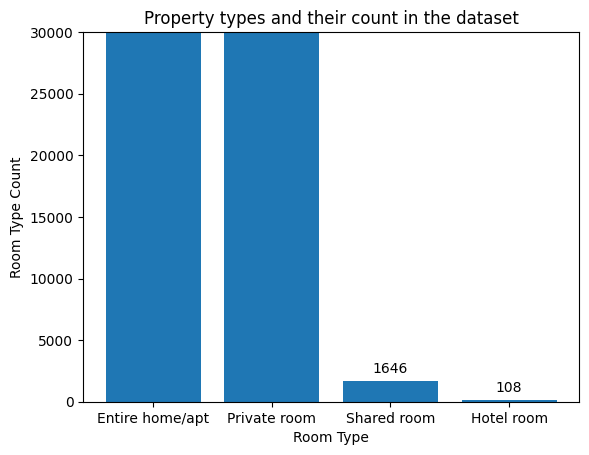

In [ ]:
#Room type plotted on barchart
room_type_bar=plt.bar(property_types.index,property_types['count'])
plt.bar_label(room_type_bar,labels=property_types.loc[:,'count'],padding=4);
plt.ylim([0,30000]);
plt.xlabel('Room Type');
plt.ylabel('Room Type Count');
plt.title('Property types and their count in the dataset');

Which neighbourhood group has the highets number of listings?

In [ ]:
hood_group=df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Brooklyn,34635
Manhattan,34566
Queens,11126
Bronx,2267
Staten Island,816
brooklyn,1


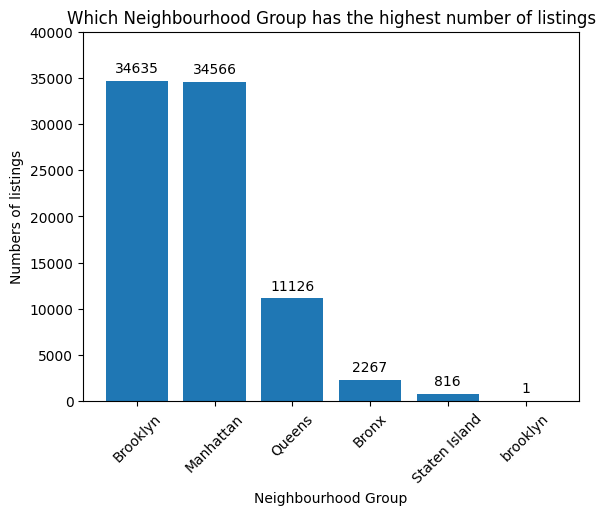

In [ ]:
hood_group_bar=plt.bar(hood_group.index,hood_group.loc[:,'count']);
plt.bar_label(hood_group_bar,labels=hood_group.loc[:,'count'],padding=4);
plt.ylim([0,40000]);
plt.xlabel('Neighbourhood Group');
plt.ylabel('Numbers of listings');
plt.xticks(rotation=45);
plt.title('Which Neighbourhood Group has the highest number of listings');


Which neighbourhoods group have the highest average prices for Airbnb listings?

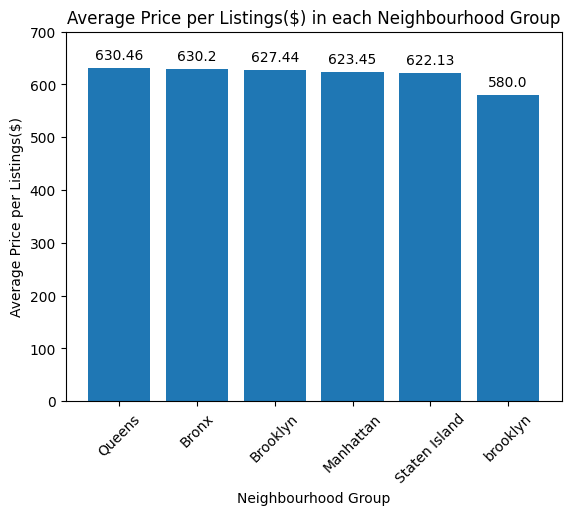

In [ ]:
avg_price=df.groupby('neighbourhood group')['$price'].mean().sort_values(ascending=False).to_frame()
avg_price_bar=plt.bar(avg_price.index,avg_price.loc[:,'$price']);
plt.bar_label(avg_price_bar,labels=round(avg_price.loc[:,'$price'],2),label_type='edge',padding=4);
plt.ylim([0,700]);
plt.xlabel('Neighbourhood Group');
plt.ylabel('Average Price per Listings($)');
plt.xticks(rotation=45);
plt.title('Average Price per Listings($) in each Neighbourhood Group');

Is there a relationship between the construction year of property and price?

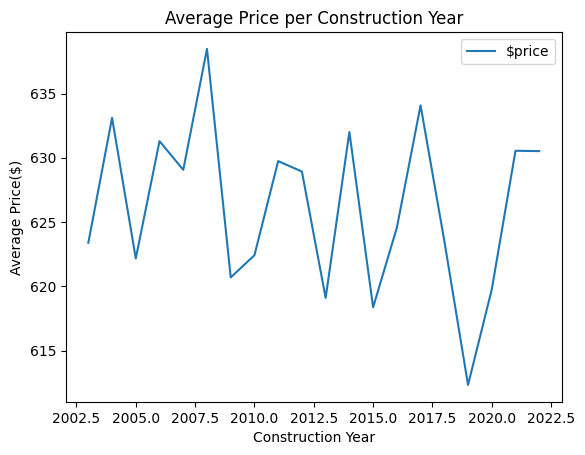

In [ ]:
df.groupby(df['Construction year'])['$price'].mean().to_frame().plot();
plt.xlabel('Construction Year');
plt.ylabel('Average Price($)');
plt.title('Average Price per Construction Year');


Who are the top 10 hosts by calculated host listing count?


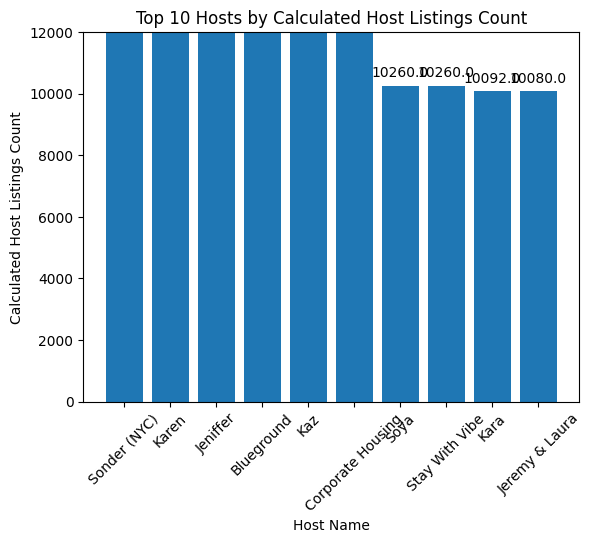

In [ ]:
hosts=df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending=False).to_frame().head(10)
hosts_bar=plt.bar(hosts.index,hosts.loc[:,'calculated host listings count']);
plt.bar_label(hosts_bar,labels=hosts.loc[:,'calculated host listings count'],padding=4);
plt.xlabel('Host Name');
plt.ylabel('Calculated Host Listings Count');
plt.xticks(rotation=45);
plt.ylim([0,12000]);
plt.title('Top 10 Hosts by Calculated Host Listings Count');


Are hosts with verified identities more lilely to recieve positive reviews?

In [ ]:
review=df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending=False).to_frame()
review

,review rate number
host_identity_verified,
verified,3.284186
unconfirmed,3.273370


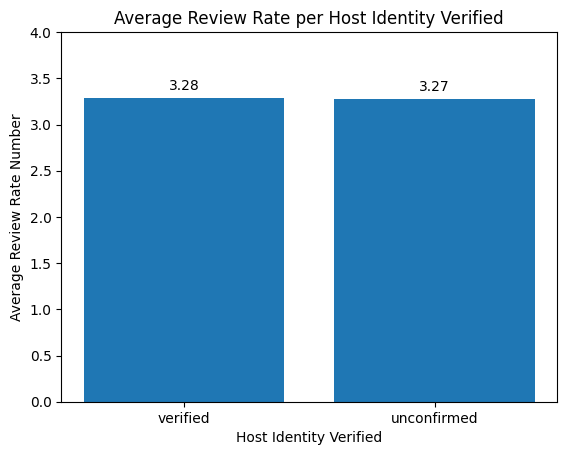

In [ ]:
review_bar=plt.bar(review.index,review.loc[:,'review rate number']);
plt.bar_label(review_bar,labels=round(review.loc[:,'review rate number'],2),padding=4);
plt.ylim([0,4]);
plt.xlabel('Host Identity Verified');
plt.ylabel('Average Review Rate Number');
plt.title('Average Review Rate per Host Identity Verified');



/tmp/ipython-input-2832415117.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x='host_identity_verified',y='review rate number',palette=base_colour);


ValueError: Could not generate a palette for <map object at 0x7b16dbd8ad70>

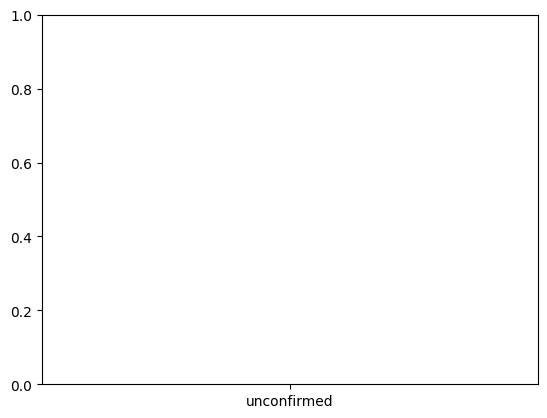

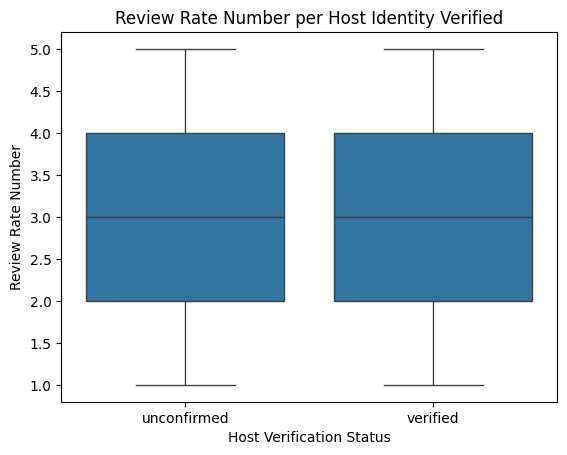

In [ ]:
base_colour=sns.color_palette()[0]
sns.boxplot(data=df,x='host_identity_verified',y='review rate number',color=base_colour);
plt.xlabel('Host Verification Status');
plt.ylabel('Review Rate Number');
plt.title('Review Rate Number per Host Identity Verified');


Is there a correlation between the price of a listing and its  service fee?

In [ ]:
df['$price'].corr(df['$service fee'])

np.float64(0.9999909074778258)

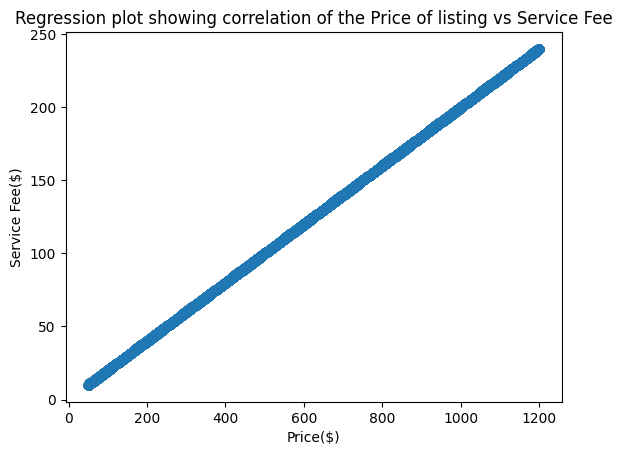

In [ ]:
sns.regplot(df,x='$price',y='$service fee');
plt.xlabel('Price($)');
plt.ylabel('Service Fee($)');
plt.title('Regression plot showing correlation of the Price of listing vs Service Fee');

The Pearson correlation coefficient between the price and service fee is 0.99,indicating a highly robust positive correlation .

 **What is the average review rate number(e.g.,stars)for listing,and does it vary based on the neighbourhood group and room type?**

In [ ]:
ARRN=df.groupby(['neighbourhood group','room type'])['review rate number'].mean().to_frame()
ARRN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.381881
                    Private room               3.305810
                    Shared room                3.356322
Brooklyn            Entire home/apt            3.242491
                    Hotel room                 3.833333
                    Private room               3.274860
                    Shared room                3.323383
Manhattan           Entire home/apt            3.268846
                    Hotel room                 3.500000
                    Private room               3.285605
                    Shared room                3.261976
Queens              Entire home/apt            3.350045
                    Hotel room                 3.750000
                    Private room               3.310847
                    Shared room                3.327402
Staten Island       Entire home/apt            3.333333
                    Private room               3.497449
                    Shared room                3.714286
brooklyn            Private room               4.000000

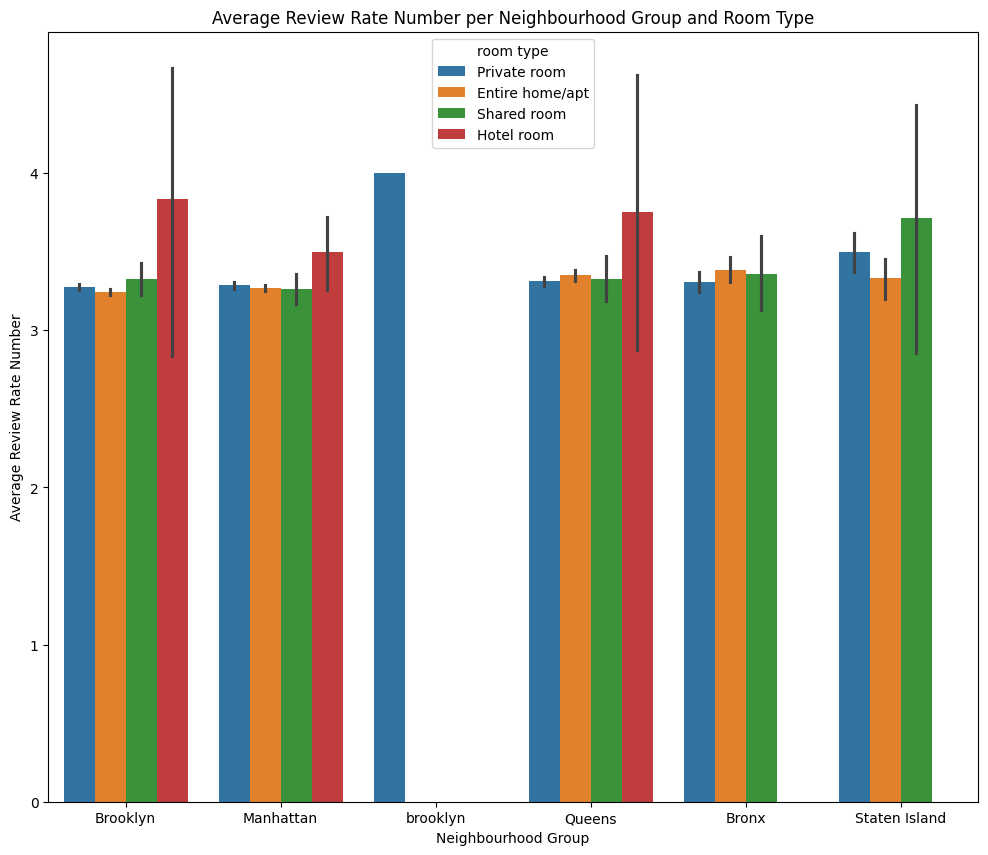

In [ ]:
plt.figure(figsize=[12,10]);
sns.barplot(data=df,x='neighbourhood group',y='review rate number',hue='room type');
plt.xlabel('Neighbourhood Group');
plt.ylabel('Average Review Rate Number');
plt.title('Average Review Rate Number per Neighbourhood Group and Room Type');


Are hosts with higher calculated host listings count more likely to recieve positive reviews?

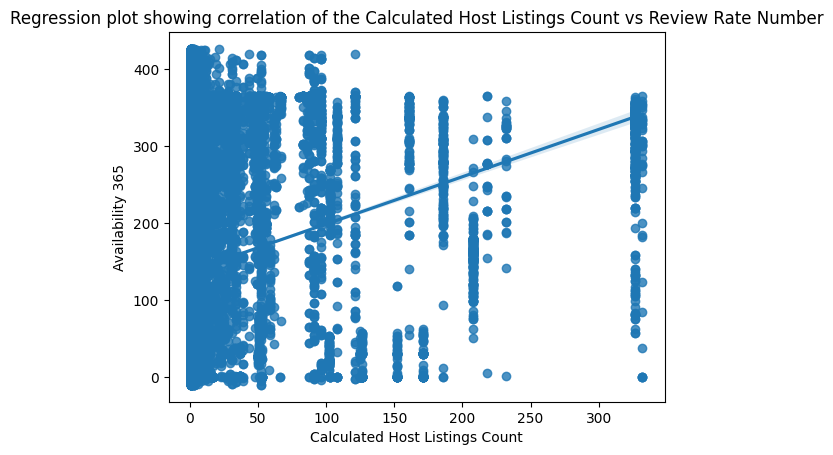

In [ ]:
sns.regplot(df,x='calculated host listings count',y='availability 365');
plt.xlabel('Calculated Host Listings Count');
plt.ylabel('Availability 365');
plt.title('Regression plot showing correlation of the Calculated Host Listings Count vs Review Rate Number');


In [ ]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(0.1359855273675869)

The Pearson correlation coefficient for this association between calculated listings and availability 365 is 0.136, indicating a weak positive correlation.

# **Conclusion**

In conclusion,this project has provided a comprehensive analysis of the New York City Airbnb dataset,shedding light on various aspects of the short-term lodging market.Through data wrangling,exploratory data analysis(EDA),and interpretation of summary statistics,we have uncovered valuable insights into listing distribution,pricing dynamics,host and review analysis.

Furthermore,conucting sentiment analysis on guest reviews to understand factors driving customer satisfaction and preferences could inform targeted marketing strategies and product improvements for Airbnb.Lastly,expanding the analysis to include predictive modeling techniques,such as regression or machine learning algorithms,could enable forcasting of listing demand,pricing trends and customer behavior,facilitating strategic decisions-making for stakeholders in the short-term lodging industry.